<a href="https://colab.research.google.com/github/dipansh-girdhar/Projects-Assignments---Data-Science-Analytics/blob/master/Template_Matching_Image_Processing/Template_Matching_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


!pip uninstall opencv-contrib-python
!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

Uninstalling opencv-contrib-python-3.3.0.10:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python-3.3.0.10.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-3.3.0.10
  Using cached https://files.pythonhosted.org/packages/6a/8c/2ceec0162a5978592e9ca9a47976d61de3c28c55d2710045ded9c2333b78/opencv_contrib_python-3.3.0.10-cp36-cp36m-manylinux1_x86_64.whl


In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imutils
import glob
from google.colab.patches import cv2_imshow

In [0]:
import argparse

In [0]:
import easydict
args = easydict.EasyDict({
        "template": 'appy.jpg',
        "image": 'T2-Store-1.jpeg',
        "visualize": False
})

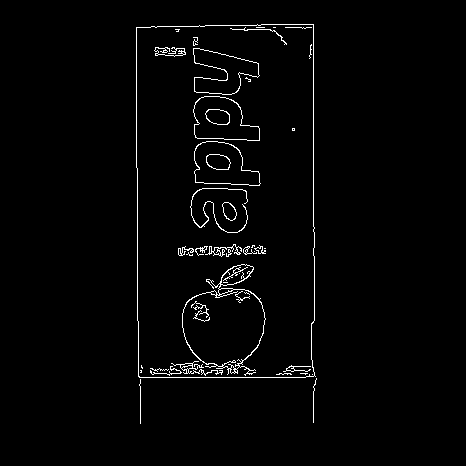

In [0]:
img_rgb = cv.imread('T2-Store-1.jpeg')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
# template = cv.imread('appy.jpg',0)
template = cv.imread(args["template"],0)
# template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
template = cv.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2_imshow(template)

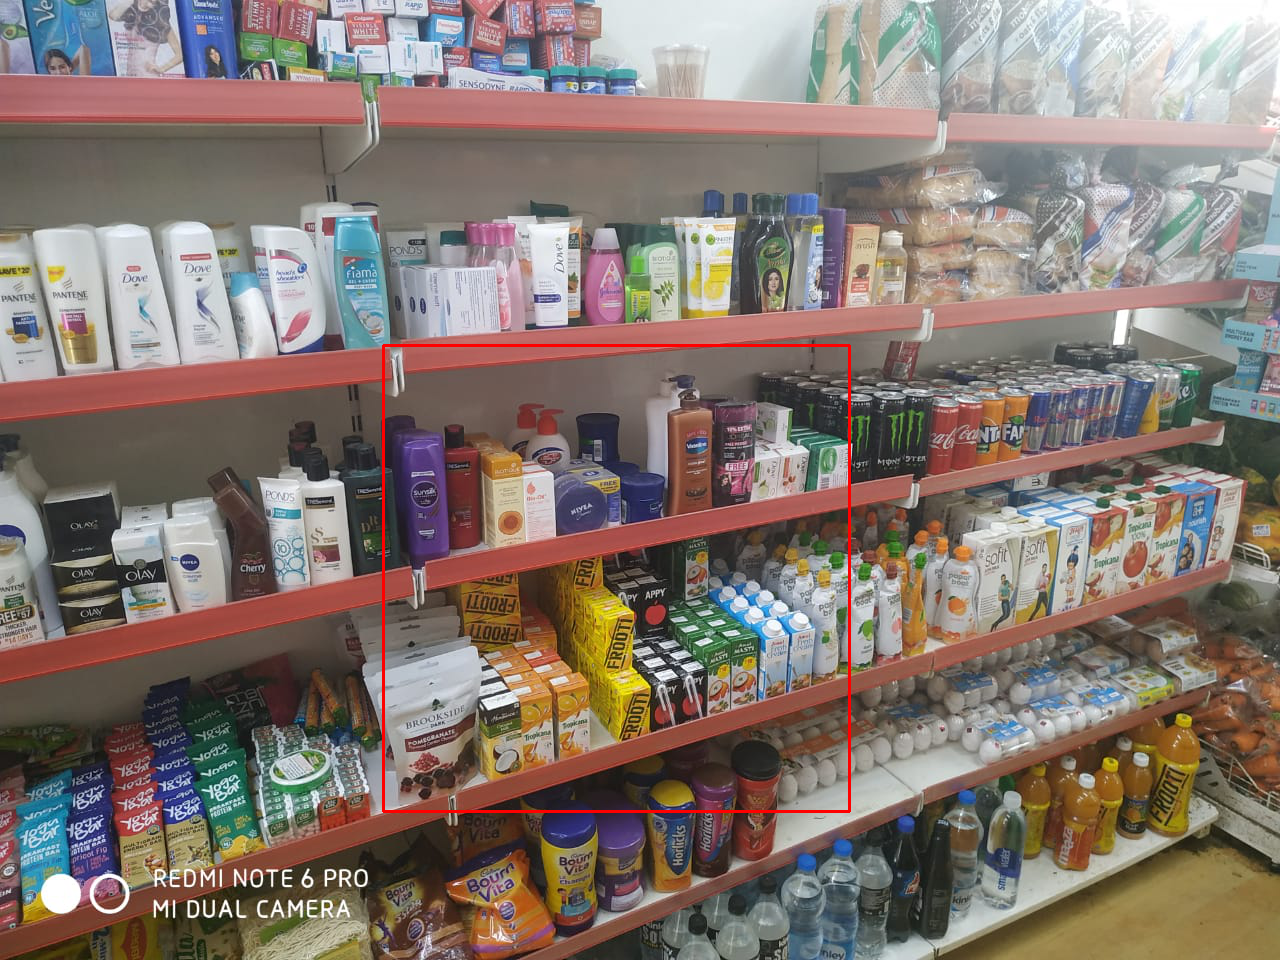

In [0]:
for imagePath in glob.glob(args["image"]):
	
	image = cv.imread(imagePath)
	gray = cv.imread(imagePath,0)
	found = None
 
	for scale in np.linspace(0.2, 1.0, 10)[::-1]:
		
		resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
		r = gray.shape[1] / float(resized.shape[1])
 
		if resized.shape[0] < tH or resized.shape[1] < tW:
			break
    
		edged = cv.Canny(resized, 50, 200)
		result = cv.matchTemplate(edged, template, cv.TM_CCOEFF)
		(_, maxVal, _, maxLoc) = cv.minMaxLoc(result)
 
		# check to see if the iteration should be visualized
		if args.get("visualize", True):
			# draw a bounding box around the detected region
			clone = np.dstack([edged, edged, edged])
			cv.rectangle(clone, (maxLoc[0], maxLoc[1]),
				(maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
			cv.imshow("Visualize", clone)
			cv.waitKey(0)
 
		if found is None or maxVal > found[0]:
			found = (maxVal, maxLoc, r)
 
	(_, maxLoc, r) = found
	(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
	(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
 
	# draw a bounding box around the detected result and display the image
	cv.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
	cv2_imshow(image)
	cv.waitKey(0)
  

In [0]:
cv.imwrite('result.png',image)

True

### If there were more images available to train, the accuracy of the bounding boxes would've been much greater. But even now, it works perffectly well and can detect an Appy tetrapack in any image.